# **Spotting Fake News with Python**

This project aims to investigate the task of spotting fake news and apply classic and modern machine learning techniques to develop a model that can classify news as real or fake. It is part of an assignment for the course `486205 - APRENDIZADO DE MÁQUINA` at the **Federal University of São Carlos (UFSCar)**, lectured by the professor **Tiago A. Almeida**.

---
## **Enviroment Setup and Loading Data**

The first step in this problem is to import the tools we will need further in the project. To begin the setup, we imported **pandas** and **NumPy** to manipulate the data.

News is written in a natural language that humans understand, so it is necessary to clean and prepare this data for machine processing. To satisfy our natural language processing needs throughout the project, we have decided to use the **NLTK** and **SkLearn** libraries. 

To improve our understanding of the task and the data we are working with, we have chosen **matplotlib** and **seaborn** as our visualization libraries to clarify the extracted information from the processed news.

Compiling all the decisions, we imported the following libraries for this project:

- pandas
- NumPy
- NLTK
- SkLearn
- matplotlib
- seaborn

In [ ]:
#Basic imports
import numpy as np
import pandas as pd

#NLP
import nltk
import sklearn

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

The data we are using in this project was provided by the professor for use in the assignment. It compiles news automatically collected during 2019 and 2020 with no supervision. This indicates the possibility of data corruption or information loss during the collection phase. A given news presented in the dataset can be classified in a binary way:

- **1** -> The news is <span style="color:LightGreen">trustworthy</span> (Real).
- **0** -> The news is <span style="color:Tomato">not trustworthy</span> (Possibly Fake).

However, it wasn't possible to check if the information was reliable in a large amount of samples. Thus, these news articles do not exhibit any label attached to them. The data is organized by month and year in separate CSV files, which include a unique identification for each article, both the titles and contents, the date when the article written and the binary label attached to them. To work with this data, we imported each file and compiled them in a single data frame.

In [ ]:
files = ["news_data_01_Jan_2019.csv",
         "news_data_02_Feb_2019.csv",
         "news_data_03_Mar_2019.csv",
         "news_data_04_Apr_2019.csv",
         "news_data_05_May_2019.csv",
         "news_data_06_Jun_2019.csv",
        # "news_data_07_Jul_2019.csv",
        #  "news_data_08_Aug_2019.csv",
        #  "news_data_09_Sep_2019.csv",
        #  "news_data_10_Oct_2019.csv",
        #  "news_data_11_Nov_2019.csv",
        #  "news_data_12_Dec_2019.csv",
        #  "news_data_13_Jan_2020.csv",
        #  "news_data_14_Feb_2020.csv",
        #  "news_data_15_Mar_2020.csv",
        #  "news_data_16_Apr_2020.csv",
        #  "news_data_17_May_2020.csv",
        #  "news_data_18_Jun_2020.csv",
        #  "news_data_19_Jul_2020.csv",
        #  "news_data_20_Aug_2020.csv",
        #  "news_data_21_Sep_2020.csv",
        #  "news_data_22_Oct_2020.csv",
        #  "news_data_23_Nov_2020.csv",
        #  "news_data_24_Dec_2020.csv",
         ]

data = pd.concat((pd.read_csv("./data/"+f) for f in files), ignore_index=True)
data.set_index('id',inplace=True)

Y = pd.read_csv('./data/train.csv')
Y.set_index('id',inplace=True)
data = data.join(Y)
data.rename(columns={"label": "class_label"},inplace=True)

---
## **Exploring the news and their content**

First, we looked at some of the news and their content. We can observe the lack of annotation in many news articles. Another thing we immediately notice is the massive size of the dataset, with over 2 million articles in total.

In [25]:
display(data)

,title,content,date,label
id,,,,
id-1070176,Five signings Man City could make to cure thei...,"In World Cup winner Benjamin Mendy , Man City ...",2019-01-16,NaN
id-1072326,How hackers could have stolen your seats or ca...,PASSENGERS travelling with one of 141 internat...,2019-01-17,NaN
id-1062508,"Onimusha: Warlords review | Switch, PS4 and Xb...",At times it can feel that Capcom ’ s samurai a...,2019-01-15,0.0
id-1080550,From bins bedlam to Brexit - an eventful year ...,The Local Democracy Reporting Scheme is markin...,2019-01-18,NaN
id-1114787,New York Aborted More Babies In Three Years Th...,New York saw more abortions in a three-year ti...,2019-01-26,1.0
...,...,...,...,...
id-1543064,German road toll discriminates against foreign...,A planned German motorway toll is against EU l...,2019-06-18,0.0
id-1545690,Man Who Shared Video of Christchurch Shooting ...,The man responsible for distributing a video o...,2019-06-18,NaN
id-1592577,John Humphrys drops out of BBC top ten earners...,John Humphrys has fallen out of the BBC ’ s to...,2019-06-30,0.0


To better understand the impact of the missing labels and possible information loss during the collection phase, we further investigate the missing values counting their occurrence and the relative percentage of missing values for each feature. While some articles may lack titles or content information, only about $1\%$ of the total articles are affected by this. When looking at the missing labels, we can observe that around $50\%$ of the articles aren't classified, half of the dataset size.

In [26]:
# Counting NaN values in each column
nan_counts = data.isna().sum()
print(f"\033[93mNaN values in each column:\033[0m\n{nan_counts}\n")

# Calculating the percentage of NaN values in each column
nan_percentage = (nan_counts / len(data)) * 100
print(f"\033[93mPercentage of NaN values in each column:\033[0m\n{nan_percentage}\n")

# Counting the total number of NaN values in the dataset
total_nan = nan_counts.sum()
print(f"\033[93mTotal NaN values in the dataset:\033[0m\n{total_nan}")

NaN values in each column:
title        6058
content      7072
date            0
label      308357
dtype: int64

Percentage of NaN values in each column:
title       1.017729
content     1.188078
date        0.000000
label      51.803201
dtype: float64

Total NaN values in the dataset:
321487


This lack of information poses a significant challenge in classifying news articles. We are not specialized in this area to accurately fill in the missing labels. Therefore, we decided to exclude these articles from the dataset and only work with items that have a label.

In [ ]:
# Excluding the NaN values
data.dropna(inplace=True)

Moving further into the exploratory analysis phase, we checked the distribution of real and fake labeled articles in the dataset. For this, we counted each label and graphed them in a bar plot with the amount of articles and percentage for each label. The bars are color-coded <span style="color:LightGreen">green</span> for <span style="color:LightGreen">trustworthy articles</span> and <span style="color:Tomato">red</span> for <span style="color:Tomato">untrustworthy articles</span>. We can notice that there are considerably more fake articles in the data compared to real ones. Almost $80\%$ of the news articles are fake, which is something we had to account for later in the training stages.

C:\Users\luwul\AppData\Local\Temp\ipykernel_20172\120267072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


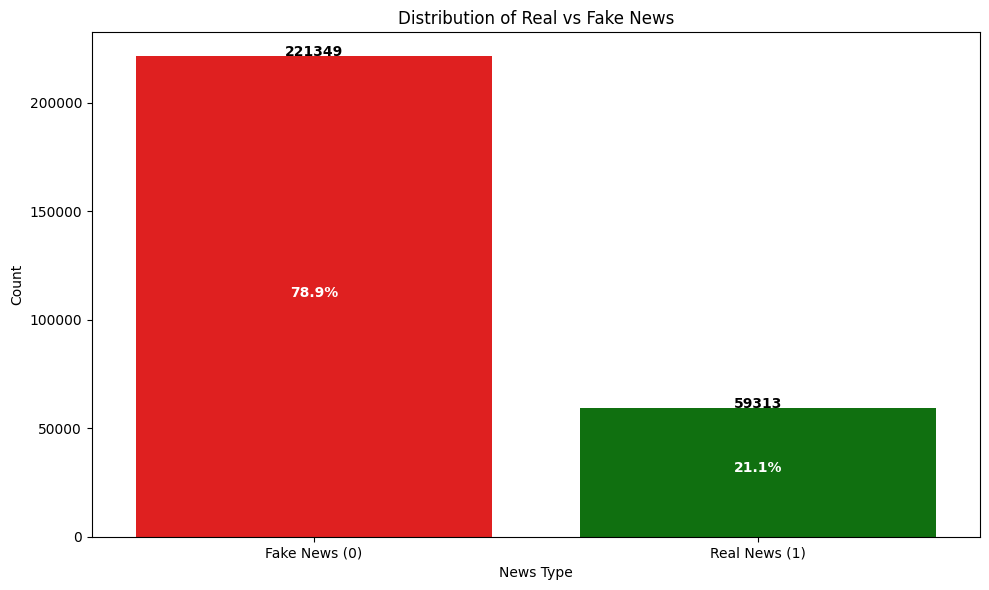

In [ ]:
label_counts = data['class_label'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    palette=['red', 'green'])

# Customize titles and labels
plt.xlabel('News Type')
plt.ylabel('Count')
plt.title('Distribution of Real vs Fake News')
plt.xticks([0, 1], ['Fake News (0)', 'Real News (1)'])

# Add count on top of each bar
for i, count in enumerate(label_counts.values):
    plt.text(
        i,
        count + 100,
        f'{count}',
        ha='center',
        fontweight='bold'
    )

# Add percentage on top of each bar
total = len(data)
for i, count in enumerate(label_counts.values):
    percentage = (count / total) * 100
    plt.text(
        i,
        count/2,
        f'{percentage:.1f}%',
        ha='center',
        color='white',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

To prepare the data for a deeper analysis and later be fed into machine learning algorithms, we transformed the articles written in natural language into a more computer-friendly representation. Firstly, we removed digits, punctuation, and words of 3 characters or shorter. This reduces the amount of tokens in the resulting representation, and they can be safely removed since they don't add much information value to the context of the articles.

In [ ]:
# Remove Numbers
data['content'] = data['content'].str.replace(r'\d+', '',regex=True)
data['title'] = data['title'].str.replace(r'\d+', '',regex=True)

# Remove Short Words
data['content'] = data['content'].str.replace(r'(\b\w{1,3}\b)', '',regex=True)
data['title'] = data['title'].str.replace(r'(\b\w{1,3}\b)', '',regex=True)

# Remove Punctuation
data['content'] = data['content'].str.replace(r'[^\w\s]', '',regex=True)
data['title'] = data['title'].str.replace(r'[^\w\s]', '',regex=True) 

With a cleaner text to work with, we start the process of tokenizing the articles into term-document matrices. As for the technique chosen for representing the data, we decided on the classical approach term frequency-inverse document frequency (TF-IDF). Due to the massive size of the data we are dealing with, we decided to also implement a step of lemmatization to reduce the words to their lemma and further reduce the tokens in the representation. The article's titles and content were transformed separately and their words were annotated with a suffix when merged into the main dataframe object.

In [ ]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('wordnet')

class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

vect = TfidfVectorizer(
    max_features=3500,
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    tokenizer=LemmaTokenizer()
)

In [ ]:
bow_content = vect.fit_transform(data['content'])
content = pd.DataFrame(bow_content.toarray(),index=data.index.values,columns=vect.get_feature_names_out())
vocab_content = vect.vocabulary_

bow_title = vect.fit_transform(data['title'])
title = pd.DataFrame(bow_title.toarray(),index=data.index.values,columns=vect.get_feature_names_out())
vocab_title = vect.vocabulary_

In [ ]:
data.drop(columns='content',inplace=True)
data.drop(columns='title',inplace=True)
data.drop(columns='date',inplace=True)

data = data.join(content,rsuffix='_c')
data = data.join(title,rsuffix='_t')

display(data)

---
## **Applying machine learning to detect fake news**

---
## **Experiment Results and Comments**